In [1]:
import requests
import geopandas as gpd
import pandas as pd
#from shapely.geometry import Polygon, Point, MultiPolygon
import shapely.wkb

from keplergl import KeplerGl

import LMIPy as lmi
from LMIPy import utils

In [4]:
queryUrl = 'https://api.resourcewatch.org/v1/query/Politcial-Boundaries-GADM-adminitrative-level-1-1490086842541'
queryParams = {'sql': "select the_geom, name_1 from gadm28_adm1 where iso='USA'"}
#queryParams = {'sql': "select * from gadm28_adm1 where name_1='California'"}
resp = requests.get(queryUrl, queryParams)

In [5]:
data = resp.json()['data']

In [4]:
for el in data:
    geometry =  shapely.wkb.loads(el['the_geom'], hex=True)
    name = el['name_1']
    el['geometry']=geometry
    

In [5]:
data[0].keys()

dict_keys(['the_geom', 'name_1', 'geometry'])

In [6]:
gdf = gpd.GeoDataFrame(data)
gdf.head()

,the_geom,name_1,geometry
0,0106000020E61000000100000001030000000100000059...,North Dakota,"MULTIPOLYGON (((-97.22948 49.00002, -97.23483 ..."
1,0106000020E61000001D000000010300000001000000AF...,Hawaii,"MULTIPOLYGON (((-155.84998 20.26800, -155.8483..."
2,0106000020E6100000EF0E000001030000000100000005...,Alaska,"MULTIPOLYGON (((-179.13147 51.20972, -179.1320..."
3,0106000020E6100000020000000103000000010000006F...,Alaska,"MULTIPOLYGON (((-141.31459 60.05416, -141.3083..."
4,0106000020E6100000010000000103000000010000005B...,Wisconsin,"MULTIPOLYGON (((-89.95798 47.29118, -90.39261 ..."


In [7]:
#plot with kepplergl
#map_1 = KeplerGl(height=400)
#map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [8]:
#map_1.add_data(gdf)

In [7]:
water_risk = pd.read_csv('./water_risk_indicators_annual.csv')
water_risk.head()

,the_geom,cartodb_id,field_1,aq30_id,bwd_cat,bwd_label,bws_cat,bws_label,cep_cat,cep_label,...,w_awr_tex_rrr_cat,w_awr_tex_rrr_label,w_awr_tex_rrr_weight_fraction,w_awr_tex_tot_cat,w_awr_tex_tot_label,w_awr_tex_tot_weight_fraction,gid_1,pfaf_id,string_id,location_name
0,NaN,9,8,68236,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NoData,0.000000,NaN,NoData,0.000000,TKL.3_1,-9999,None-TKL.3_1-None,NaN
1,NaN,115,114,68290,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,Low (0-1),0.163265,0.0,Low (0-1),0.163265,UMI.1_1,-9999,None-UMI.1_1-None,NaN
2,NaN,183,182,68111,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NoData,0.000000,NaN,NoData,0.000000,SJM.2_1,-9999,None-SJM.2_1-100,NaN
3,NaN,421,420,68296,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,Low (0-1),0.163265,0.0,Low (0-1),0.163265,UMI.6_1,-9999,None-UMI.6_1-1747,NaN
4,NaN,577,576,4493,0.0,Low (<5%),0.0,Low (<10%),1.0,Low - Medium (-5 to 0),...,4.0,Extremely High (4-5),0.326531,4.0,Extremely High (4-5),0.918367,COG.11_1,132210,132210-COG.11_1-2285,NaN


In [8]:
#y2018m12d06_rh_master_shape_v01 r on s.aq30_id
water_risk.columns

Index(['the_geom', 'cartodb_id', 'field_1', 'aq30_id', 'bwd_cat', 'bwd_label',
       'bws_cat', 'bws_label', 'cep_cat', 'cep_label',
       ...
       'w_awr_tex_rrr_cat', 'w_awr_tex_rrr_label',
       'w_awr_tex_rrr_weight_fraction', 'w_awr_tex_tot_cat',
       'w_awr_tex_tot_label', 'w_awr_tex_tot_weight_fraction', 'gid_1',
       'pfaf_id', 'string_id', 'location_name'],
      dtype='object', length=154)

In [9]:
cfr = water_risk[['aq30_id','cfr_label','cfr_cat','rfr_label', 'rfr_cat','the_geom']]
cfr.head()

,aq30_id,cfr_label,cfr_cat,rfr_label,rfr_cat,the_geom
0,68236,NaN,NaN,NaN,NaN,NaN
1,68290,NaN,NaN,NaN,NaN,NaN
2,68111,NaN,NaN,NaN,NaN,NaN
3,68296,NaN,NaN,NaN,NaN,NaN
4,4493,"Low (0 to 9 in 1,000,000)",0.0,"High (6 in 1,000 to 1 in 100)",3.0,NaN


In [10]:
!ls

Data_prototype.ipynb                    y2018m12d06_rh_master_shape_v01.geojson
water_risk_indicators_annual.csv


In [11]:
shapes = gpd.read_file('./y2018m12d06_rh_master_shape_v01.geojson')
shapes.head()

,cartodb_id,aq30_id,aqid,gid_1,pfaf_id,string_id,type,geometry
0,1,0,3365,EGY.11_1,111011,111011-EGY.11_1-3365,Polygon,"MULTIPOLYGON (((31.90591 29.85789, 31.90257 29..."
1,32,31,-9999,-9999,111015,111015-None-None,MultiPolygon,"MULTIPOLYGON (((32.66612 29.11190, 32.65767 29..."
2,76,75,-9999,-9999,111050,111050-None-None,MultiPolygon,"MULTIPOLYGON (((36.15383 22.66493, 36.14938 22..."
3,90,89,3365,ERI.2_1,111081,111081-ERI.2_1-3365,Polygon,"MULTIPOLYGON (((38.02383 17.54908, 38.02512 17..."
4,113,112,3365,ERI.6_1,111086,111086-ERI.6_1-3365,Polygon,"MULTIPOLYGON (((37.36667 16.18750, 37.35869 16..."


In [12]:
gdf_cfr = cfr.merge(shapes, on='aq30_id', how='inner')
gdf_cfr.head()

,aq30_id,cfr_label,cfr_cat,rfr_label,rfr_cat,the_geom,cartodb_id,aqid,gid_1,pfaf_id,string_id,type,geometry
0,68236,NaN,NaN,NaN,NaN,NaN,68237,-9999,TKL.3_1,-9999,None-TKL.3_1-None,MultiPolygon,"MULTIPOLYGON (((-171.78909 -9.13445, -171.7852..."
1,68290,NaN,NaN,NaN,NaN,NaN,68291,-9999,UMI.1_1,-9999,None-UMI.1_1-None,Polygon,"MULTIPOLYGON (((-176.47343 0.19012, -176.48549..."
2,68111,NaN,NaN,NaN,NaN,NaN,68112,100,SJM.2_1,-9999,None-SJM.2_1-100,MultiPolygon,"MULTIPOLYGON (((19.85245 79.39228, 19.84584 79..."
3,68296,NaN,NaN,NaN,NaN,NaN,68297,1747,UMI.6_1,-9999,None-UMI.6_1-1747,Polygon,"MULTIPOLYGON (((-177.35984 28.21483, -177.3602..."
4,4493,"Low (0 to 9 in 1,000,000)",0.0,"High (6 in 1,000 to 1 in 100)",3.0,NaN,4494,2285,COG.11_1,132210,132210-COG.11_1-2285,Polygon,"MULTIPOLYGON (((16.19168 -3.18750, 16.18750 -3..."


In [14]:
gdf_cfr_2 =gpd.GeoDataFrame(gdf_cfr)

In [15]:
fr_usa = gpd.sjoin(gdf, gdf_cfr_2, how='inner')
fr_usa.head()

,the_geom_left,name_1,geometry,index_right,aq30_id,cfr_label,cfr_cat,rfr_label,rfr_cat,the_geom_right,cartodb_id,aqid,gid_1,pfaf_id,string_id,type
0,0106000020E61000000100000001030000000100000059...,North Dakota,"MULTIPOLYGON (((-97.22948 49.00002, -97.23483 ...",3119,51954,"Low (0 to 9 in 1,000,000)",0.0,"Low (0 to 1 in 1,000)",0.0,NaN,51955,1009,CAN.3_1,712293,712293-CAN.3_1-1009,Polygon
0,0106000020E61000000100000001030000000100000059...,North Dakota,"MULTIPOLYGON (((-97.22948 49.00002, -97.23483 ...",49760,51953,"Low (0 to 9 in 1,000,000)",0.0,"Low (0 to 1 in 1,000)",0.0,NaN,51954,1009,CAN.12_1,712293,712293-CAN.12_1-1009,Polygon
0,0106000020E61000000100000001030000000100000059...,North Dakota,"MULTIPOLYGON (((-97.22948 49.00002, -97.23483 ...",49753,51898,"Low (0 to 9 in 1,000,000)",0.0,"Medium - High (2 in 1,000 to 6 in 1,000)",2.0,NaN,51899,1009,CAN.3_1,712261,712261-CAN.3_1-1009,Polygon
0,0106000020E61000000100000001030000000100000059...,North Dakota,"MULTIPOLYGON (((-97.22948 49.00002, -97.23483 ...",59559,51967,"Low (0 to 9 in 1,000,000)",0.0,"Low - Medium (1 in 1,000 to 2 in 1,000)",1.0,NaN,51968,1048,CAN.12_1,712299,712299-CAN.12_1-1048,Polygon
0,0106000020E61000000100000001030000000100000059...,North Dakota,"MULTIPOLYGON (((-97.22948 49.00002, -97.23483 ...",59558,51966,"Low (0 to 9 in 1,000,000)",0.0,"Low - Medium (1 in 1,000 to 2 in 1,000)",1.0,NaN,51967,1009,CAN.12_1,712299,712299-CAN.12_1-1009,Polygon


In [16]:
fr_usa = fr_usa[['name_1','geometry','cfr_label','rfr_label' ]]
fr_usa.head()

,name_1,geometry,cfr_label,rfr_label
0,North Dakota,"MULTIPOLYGON (((-97.22948 49.00002, -97.23483 ...","Low (0 to 9 in 1,000,000)","Low (0 to 1 in 1,000)"
0,North Dakota,"MULTIPOLYGON (((-97.22948 49.00002, -97.23483 ...","Low (0 to 9 in 1,000,000)","Low (0 to 1 in 1,000)"
0,North Dakota,"MULTIPOLYGON (((-97.22948 49.00002, -97.23483 ...","Low (0 to 9 in 1,000,000)","Medium - High (2 in 1,000 to 6 in 1,000)"
0,North Dakota,"MULTIPOLYGON (((-97.22948 49.00002, -97.23483 ...","Low (0 to 9 in 1,000,000)","Low - Medium (1 in 1,000 to 2 in 1,000)"
0,North Dakota,"MULTIPOLYGON (((-97.22948 49.00002, -97.23483 ...","Low (0 to 9 in 1,000,000)","Low - Medium (1 in 1,000 to 2 in 1,000)"


In [61]:
fr_usa.to_file('flood_risk_USA.json',
    driver='GeoJSON')

In [19]:
fr_usa.to_csv('flood_risk_USA.csv')

### Generation of mbtiles:

In [2]:
import os
import requests
import geopandas as gpd
import shapely.wkb 
from carto.auth import APIKeyAuthClient
from carto.sql import BatchSQLClient
from carto.sql import SQLClient
from tqdm import tqdm
import getpass
import subprocess
import time

## Define functions:


In [7]:
def df_from_carto(account, query):
    """
    It gets data by querying a carto table and converts it into a GeoDataFrame.
    """
    urlCarto = f"https://{account}.carto.com/api/v2/sql"
    
    sql = {"q": query}
    r = requests.get(urlCarto, params=sql)
    
    data = r.json()
    
    df = gpd.GeoDataFrame(data.get("rows"))
    if 'the_geom' in df.columns:
        # Change geometry from WKB to WKT format
        df['geometry'] = df.apply(lambda x: shapely.wkb.loads(x['the_geom'],hex=True), axis=1 )
        df.drop(columns=['the_geom'], inplace=True)
        if 'the_geom_webmercator' in df.columns:
            df.drop(columns=['the_geom_webmercator'], inplace=True)
        df.crs = {'init': 'epsg:4326'}
        df = df.to_crs({'init': 'epsg:4326'})
        
    return df
def long_lasting_SQL_queries(account, query, api_key):
    # For long lasting SQL queries we use the batch SQL API.
    table_name = 'job_result'
    
    base_url = f'https://{account}.carto.com/'
    auth_client = APIKeyAuthClient(api_key=api_key, base_url=base_url)
    
    sql_query =(f'SELECT * INTO {table_name} FROM ({query}) as job')
    
    LIST_OF_SQL_QUERIES = [sql_query]
    
    batchSQLClient = BatchSQLClient(auth_client)
    createJob = batchSQLClient.create(LIST_OF_SQL_QUERIES)
    
    # Check the status of a job with the job_id every 10 s
    readJob = batchSQLClient.read(createJob['job_id'])
    
    timeout = time.time() + 60*60  # 1 hour from now
    while readJob.get('status') != 'done':
        time.sleep(10)
        print(readJob.get('status'))
        if readJob.get('status') == 'failed':
            print('Job failed.')
            break
        if time.time() > timeout:
            readJob = batchSQLClient.read(createJob['job_id'])
            # Cancel a job given its job_id
            if readJob.get('status') != 'donne':
                cancelJob = batchSQLClient.cancel(createJob['job_id'])     
                print('Job cancelled after 1 hour running')
                break
            
        readJob = batchSQLClient.read(createJob['job_id'])
       
    # Read the table
    sql = SQLClient(auth_client)
    data = sql.send("select * from "+table_name)
    
    # Drop the table
    sql = SQLClient(auth_client)
    sql.send("DROP TABLE "+table_name)
    
    df = gpd.GeoDataFrame(data.get("rows"))
    if 'the_geom' in df.columns:
        # Change geometry from WKB to WKT format
        df['geometry'] = df.apply(lambda x: shapely.wkb.loads(x['the_geom'],hex=True), axis=1 )
        df.drop(columns=['the_geom'], inplace=True)
        if 'the_geom_webmercator' in df.columns:
            df.drop(columns=['the_geom_webmercator'], inplace=True)
        df.crs = {'init': 'epsg:4326'}
        df = df.to_crs({'init': 'epsg:4326'})
        
    return df


def create_mbtiles(source_path, dest_path, layer_name, opts="-zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel"):
    """
    Use tippecanoe to create a MBTILE at dest_path from source_path.
    layer_name is used for the name of the layer in the MBTILE.
    Regex file path (/*.geojson) is supported for source_path.
    """
    cmd = f"tippecanoe -o {dest_path} -l {layer_name} {opts} {source_path}"
    print(f"Processing: {cmd}")
    r = subprocess.call(cmd, shell=True)
    if r == 0:
        print("Task created")
    else:
        print("Task failed")
    print("Finished processing")


## Read carto tiles:

In [3]:
query = """SELECT s.aq30_id as cartodb_id, coalesce(NULLIF(rfr_label,''), 'No Data') as label,
        r.the_geom, r.the_geom_webmercator,
        (CASE WHEN rfr_label = 'Insignificant Trend' THEN -1 ELSE coalesce(rfr_cat, -9999)END) as water_risk
        FROM water_risk_indicators_annual s 
        LEFT JOIN y2018m12d06_rh_master_shape_v01 r 
        on s.aq30_id=r.aq30_id WHERE s.pfaf_id != -9999 and s.gid_1 != '-9999' and r.aqid != -9999 
        ORDER BY s.aq30_id"""
    
    
account = 'wri-rw'

#query =("SELECT wri-rw FROM bio_042_ecoregions_by_biome_1_14 where biome_name = 'Tropical & Subtropical Moist Broadleaf Forests'")

rfr = df_from_carto(account, query)
rfr.head()

/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,cartodb_id,label,water_risk,geometry
0,0,Extremely High (more than 1 in 100),4,"MULTIPOLYGON (((31.90591 29.85789, 31.90257 29..."
1,1,Extremely High (more than 1 in 100),4,"MULTIPOLYGON (((32.37500 30.09167, 32.40196 30..."
2,5,"Low (0 to 1 in 1,000)",0,"MULTIPOLYGON (((31.88750 29.85833, 31.88810 29..."
3,6,"Low (0 to 1 in 1,000)",0,"MULTIPOLYGON (((32.34943 29.63997, 32.34658 29..."
4,8,"Low (0 to 1 in 1,000)",0,"MULTIPOLYGON (((31.89333 29.73371, 31.86701 29..."


In [4]:
query = "SELECT * FROM gadm28_adm2 where iso='USA'"
account = 'wri-01'
adm2 = df_from_carto(account, query)
adm2.head()

/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,cartodb_id,objectid,id_0,iso,name_0,id_1,name_1,id_2,name_2,hasc_2,...,nl_name_2,varname_2,shape_leng,shape_area,area_ha,bbox,centroid,topojson,the_geom_simple,geometry
0,41529,41529,244,USA,United States,6,Colorado,300,Sedgwick,US.CO.SE,...,None,None,1.710834,0.152897,None,None,None,None,None,"MULTIPOLYGON (((-102.65379 41.00320, -102.6204..."
1,43623,43623,244,USA,United States,42,South Dakota,2394,Hamlin,US.SD.HM,...,None,None,1.731120,0.156997,None,None,None,None,None,"MULTIPOLYGON (((-97.12849 44.54497, -97.49210 ..."
2,43650,43650,244,USA,United States,42,South Dakota,2421,Sanborn,US.SD.SA,...,None,None,1.656296,0.166732,None,None,None,None,None,"MULTIPOLYGON (((-97.84943 43.85048, -97.96616 ..."
3,44124,44124,244,USA,United States,47,Virginia,2895,Lexington,US.VA.LX,...,None,None,0.130187,0.000842,None,None,None,None,None,"MULTIPOLYGON (((-79.44795 37.76853, -79.45319 ..."
4,43839,43839,244,USA,United States,44,Texas,2610,Gaines,US.TX.GS,...,None,None,2.593838,0.375658,None,None,None,None,None,"MULTIPOLYGON (((-102.20379 32.52370, -102.2108..."


In [5]:
adm2= adm2[['iso','name_1','name_2','geometry']]
adm2.head()

,iso,name_1,name_2,geometry
0,USA,Colorado,Sedgwick,"MULTIPOLYGON (((-102.65379 41.00320, -102.6204..."
1,USA,South Dakota,Hamlin,"MULTIPOLYGON (((-97.12849 44.54497, -97.49210 ..."
2,USA,South Dakota,Sanborn,"MULTIPOLYGON (((-97.84943 43.85048, -97.96616 ..."
3,USA,Virginia,Lexington,"MULTIPOLYGON (((-79.44795 37.76853, -79.45319 ..."
4,USA,Texas,Gaines,"MULTIPOLYGON (((-102.20379 32.52370, -102.2108..."


In [24]:
rfr_usa = gpd.sjoin(adm2, rfr, how="inner", op='intersects')
rfr_usa.head()

,cartodb_id_left,objectid,id_0,iso,name_0,id_1,name_1,id_2,name_2,hasc_2,...,area_ha,bbox,centroid,topojson,the_geom_simple,geometry,index_right,cartodb_id_right,label,water_risk
0,41529,41529,244,USA,United States,6,Colorado,300,Sedgwick,US.CO.SE,...,None,None,None,None,None,"MULTIPOLYGON (((-102.65379 41.00320, -102.6204...",45923,54912,"Low (0 to 1 in 1,000)",0
19,42889,42889,244,USA,United States,28,Nebraska,1660,Banner,US.NE.BA,...,None,None,None,None,None,"MULTIPOLYGON (((-104.05199 41.39493, -104.0521...",45923,54912,"Low (0 to 1 in 1,000)",0
34,42920,42920,244,USA,United States,28,Nebraska,1691,Garden,US.NE.GD,...,None,None,None,None,None,"MULTIPOLYGON (((-101.98534 41.39549, -102.0551...",45923,54912,"Low (0 to 1 in 1,000)",0
260,42910,42910,244,USA,United States,28,Nebraska,1681,Deuel,US.NE.DL,...,None,None,None,None,None,"MULTIPOLYGON (((-102.05042 41.00367, -102.0504...",45923,54912,"Low (0 to 1 in 1,000)",0
429,42953,42953,244,USA,United States,28,Nebraska,1724,Perkins,US.NE.PE,...,None,None,None,None,None,"MULTIPOLYGON (((-101.24557 40.69743, -101.3431...",45923,54912,"Low (0 to 1 in 1,000)",0


In [25]:
rfr_usa = rfr_usa[['iso','name_1','name_2','geometry','label','water_risk' ]]
rfr_usa.head()

,iso,name_1,name_2,geometry,label,water_risk
0,USA,Colorado,Sedgwick,"MULTIPOLYGON (((-102.65379 41.00320, -102.6204...","Low (0 to 1 in 1,000)",0
19,USA,Nebraska,Banner,"MULTIPOLYGON (((-104.05199 41.39493, -104.0521...","Low (0 to 1 in 1,000)",0
34,USA,Nebraska,Garden,"MULTIPOLYGON (((-101.98534 41.39549, -102.0551...","Low (0 to 1 in 1,000)",0
260,USA,Nebraska,Deuel,"MULTIPOLYGON (((-102.05042 41.00367, -102.0504...","Low (0 to 1 in 1,000)",0
429,USA,Nebraska,Perkins,"MULTIPOLYGON (((-101.24557 40.69743, -101.3431...","Low (0 to 1 in 1,000)",0


In [27]:
#export to json
rfr_usa.to_file("./rfr_usa.json", driver="GeoJSON")

## create MBTILE:

In [28]:
layer_name = "rfr_usa"
source_path = "./rfr_usa.json"
dest_path = "./rfr_usa.mbtiles"
create_mbtiles(source_path, dest_path, layer_name, opts="-zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel")

Processing: tippecanoe -o ./rfr_usa.mbtiles -l rfr_usa -zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel ./rfr_usa.json
Task created
Finished processing


In [29]:
!mbview --port 9000 ./rfr_usa.mbtiles

/bin/sh: mbview: command not found


In [31]:
census = gpd.read_file('./co-est2019-alldata.csv')
census.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,geometry
0,040,3,6,01,000,Alabama,Alabama,4779736,4780125,4785437,...,0.5784335677,1.1863137707,1.5225486174,0.5634892079,0.6263573914,0.7451724354,1.0903664003,1.7737864964,2.4837435218,None
1,050,3,6,01,001,Alabama,Autauga County,54571,54597,54773,...,6.0181818182,-6.226118841,-3.902225545,1.9704433498,-1.712874805,4.777171297,0.8496560701,0.5409157704,4.5600617583,None
2,050,3,6,01,003,Alabama,Baldwin County,182265,182265,183112,...,16.641869776,17.488578535,22.751473911,20.184333668,17.725963762,21.27929069,22.398255745,24.727215272,24.380567187,None
3,050,3,6,01,005,Alabama,Barbour County,27457,27455,27327,...,0.2926757884,-6.897816914,-8.13218497,-5.140430604,-15.72457483,-18.2380157,-24.99852834,-8.754922145,-5.165664474,None
4,050,3,6,01,007,Alabama,Bibb County,22915,22915,22870,...,-4.998355804,-3.787545142,-5.797999469,1.3311443404,1.3298167069,-0.708717222,-3.234668557,-6.85709197,1.8319519224,None


In [33]:
!ls

Data_prototype.ipynb                    rfr_usa.json
MBTiles_from_Carto_data.ipynb           rfr_usa.mbtiles
co-est2019-alldata.csv                  water_risk_indicators_annual.csv
finc02_1_1.xls                          y2018m12d06_rh_master_shape_v01.geojson


In [36]:
pop = gpd.read_file('./cc-est2019-alldata.csv')
pop.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE,geometry
0,050,01,001,Alabama,Autauga County,1,0,54571,26569,28002,...,538,57,48,26,32,9,11,19,10,None
1,050,01,001,Alabama,Autauga County,1,1,3579,1866,1713,...,56,9,5,4,1,0,0,2,1,None
2,050,01,001,Alabama,Autauga County,1,2,3991,2001,1990,...,66,2,3,2,7,2,3,2,0,None
3,050,01,001,Alabama,Autauga County,1,3,4290,2171,2119,...,57,13,7,5,5,2,1,1,1,None
4,050,01,001,Alabama,Autauga County,1,4,4290,2213,2077,...,44,7,5,0,2,2,1,3,1,None


In [37]:
pop = pop[['SUMLEV','STATE','COUNTY','STNAME','CTYNAME','YEAR','AGEGRP','TOT_POP','TOT_MALE','TOT_FEMALE','WA_MALE','WA_FEMALE','BA_MALE','BA_FEMALE','IA_MALE','IA_FEMALE','AA_MALE','AA_FEMALE','NA_MALE','NA_FEMALE']]
pop

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE
0,050,01,001,Alabama,Autauga County,1,0,54571,26569,28002,21295,22002,4559,5130,119,139,200,284,29,18
1,050,01,001,Alabama,Autauga County,1,1,3579,1866,1713,1411,1316,362,317,5,3,13,15,1,0
2,050,01,001,Alabama,Autauga County,1,2,3991,2001,1990,1521,1526,399,374,14,8,17,21,1,3
3,050,01,001,Alabama,Autauga County,1,3,4290,2171,2119,1658,1620,431,406,15,12,23,18,4,1
4,050,01,001,Alabama,Autauga County,1,4,4290,2213,2077,1628,1585,502,424,12,7,25,14,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716371,050,56,045,Wyoming,Weston County,12,14,499,280,219,256,203,0,1,2,0,19,12,0,0
716372,050,56,045,Wyoming,Weston County,12,15,352,180,172,173,169,0,0,1,1,3,1,0,0
716373,050,56,045,Wyoming,Weston County,12,16,229,107,122,105,120,0,0,0,2,0,0,0,0
716374,050,56,045,Wyoming,Weston County,12,17,198,82,116,80,115,0,0,1,1,0,0,0,0


In [62]:
county_list = [el for el in pop['CTYNAME']]

In [76]:
county_match = []
for el in county_list:
    try:
        county = el.split(' ')[0]
    except:
        #print(el)
        county = 'Doña Ana'  
    county_match.append(county)

In [77]:
pop['name_2']=county_match

In [43]:
adm2.head()

,cartodb_id,objectid,id_0,iso,name_0,id_1,name_1,id_2,name_2,hasc_2,...,nl_name_2,varname_2,shape_leng,shape_area,area_ha,bbox,centroid,topojson,the_geom_simple,geometry
0,41529,41529,244,USA,United States,6,Colorado,300,Sedgwick,US.CO.SE,...,None,None,1.710834,0.152897,None,None,None,None,None,"MULTIPOLYGON (((-102.65379 41.00320, -102.6204..."
1,43623,43623,244,USA,United States,42,South Dakota,2394,Hamlin,US.SD.HM,...,None,None,1.731120,0.156997,None,None,None,None,None,"MULTIPOLYGON (((-97.12849 44.54497, -97.49210 ..."
2,43650,43650,244,USA,United States,42,South Dakota,2421,Sanborn,US.SD.SA,...,None,None,1.656296,0.166732,None,None,None,None,None,"MULTIPOLYGON (((-97.84943 43.85048, -97.96616 ..."
3,44124,44124,244,USA,United States,47,Virginia,2895,Lexington,US.VA.LX,...,None,None,0.130187,0.000842,None,None,None,None,None,"MULTIPOLYGON (((-79.44795 37.76853, -79.45319 ..."
4,43839,43839,244,USA,United States,44,Texas,2610,Gaines,US.TX.GS,...,None,None,2.593838,0.375658,None,None,None,None,None,"MULTIPOLYGON (((-102.20379 32.52370, -102.2108..."


In [78]:
demo_usa = pd.merge(pop,adm2, how="inner",on='name_2')
demo_usa.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,nl_name_2,varname_2,shape_leng,shape_area,area_ha,bbox,centroid,topojson,the_geom_simple,geometry
0,050,01,001,Alabama,Autauga County,1,0,54571,26569,28002,...,None,None,1.96225,0.149917,None,None,None,None,None,"MULTIPOLYGON (((-86.91668 32.66431, -86.82678 ..."
1,050,01,001,Alabama,Autauga County,1,1,3579,1866,1713,...,None,None,1.96225,0.149917,None,None,None,None,None,"MULTIPOLYGON (((-86.91668 32.66431, -86.82678 ..."
2,050,01,001,Alabama,Autauga County,1,2,3991,2001,1990,...,None,None,1.96225,0.149917,None,None,None,None,None,"MULTIPOLYGON (((-86.91668 32.66431, -86.82678 ..."
3,050,01,001,Alabama,Autauga County,1,3,4290,2171,2119,...,None,None,1.96225,0.149917,None,None,None,None,None,"MULTIPOLYGON (((-86.91668 32.66431, -86.82678 ..."
4,050,01,001,Alabama,Autauga County,1,4,4290,2213,2077,...,None,None,1.96225,0.149917,None,None,None,None,None,"MULTIPOLYGON (((-86.91668 32.66431, -86.82678 ..."


In [80]:
demo_usa_gdf = gpd.GeoDataFrame(demo_usa)
demo_usa_gdf.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,nl_name_2,varname_2,shape_leng,shape_area,area_ha,bbox,centroid,topojson,the_geom_simple,geometry
0,050,01,001,Alabama,Autauga County,1,0,54571,26569,28002,...,None,None,1.96225,0.149917,None,None,None,None,None,"MULTIPOLYGON (((-86.91668 32.66431, -86.82678 ..."
1,050,01,001,Alabama,Autauga County,1,1,3579,1866,1713,...,None,None,1.96225,0.149917,None,None,None,None,None,"MULTIPOLYGON (((-86.91668 32.66431, -86.82678 ..."
2,050,01,001,Alabama,Autauga County,1,2,3991,2001,1990,...,None,None,1.96225,0.149917,None,None,None,None,None,"MULTIPOLYGON (((-86.91668 32.66431, -86.82678 ..."
3,050,01,001,Alabama,Autauga County,1,3,4290,2171,2119,...,None,None,1.96225,0.149917,None,None,None,None,None,"MULTIPOLYGON (((-86.91668 32.66431, -86.82678 ..."
4,050,01,001,Alabama,Autauga County,1,4,4290,2213,2077,...,None,None,1.96225,0.149917,None,None,None,None,None,"MULTIPOLYGON (((-86.91668 32.66431, -86.82678 ..."


In [83]:
demo_usa_gdf.columns

Index(['SUMLEV', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'YEAR', 'AGEGRP',
       'TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE', 'name_2', 'cartodb_id', 'objectid', 'id_0', 'iso',
       'name_0', 'id_1', 'name_1', 'id_2', 'hasc_2', 'ccn_2', 'cca_2',
       'type_2', 'engtype_2', 'nl_name_2', 'varname_2', 'shape_leng',
       'shape_area', 'area_ha', 'bbox', 'centroid', 'topojson',
       'the_geom_simple', 'geometry'],
      dtype='object')

In [85]:
demo_usa_gdf = demo_usa_gdf[['name_2','TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 'WA_MALE', 'WA_FEMALE', 'BA_MALE',
       'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE','geometry']]

In [ ]:
#export to json
demo_usa_gdf.to_file("./demo_usa.json", driver="GeoJSON")

In [ ]:
layer_name = "demo_usa"
source_path = "./demo_usa.json"
dest_path = "./demo_usa.mbtiles"
create_mbtiles(source_path, dest_path, layer_name, opts="-zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel")

# drought:

In [11]:



query = """SELECT s.aq30_id as cartodb_id, coalesce(NULLIF(drr_label,''), 'No Data') as label,
    r.the_geom, r.the_geom_webmercator,
    (CASE WHEN drr_label = 'Insignificant Trend' THEN -1 ELSE coalesce(drr_cat, -9999)END) as water_risk 
    FROM water_risk_indicators_annual s 
    LEFT JOIN y2018m12d06_rh_master_shape_v01 r on s.aq30_id=r.aq30_id 
    WHERE s.pfaf_id != -9999 and s.gid_1 != '-9999' and r.aqid != -9999 
    ORDER BY s.aq30_id"""
    
    
account = 'wri-rw'

#query =("SELECT wri-rw FROM bio_042_ecoregions_by_biome_1_14 where biome_name = 'Tropical & Subtropical Moist Broadleaf Forests'")

dr = df_from_carto(account, query)
dr.head()



/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,cartodb_id,label,water_risk,geometry
0,0,No Data,-9999,"MULTIPOLYGON (((31.90591 29.85789, 31.90257 29..."
1,1,No Data,-9999,"MULTIPOLYGON (((32.37500 30.09167, 32.40196 30..."
2,5,No Data,-9999,"MULTIPOLYGON (((31.88750 29.85833, 31.88810 29..."
3,6,No Data,-9999,"MULTIPOLYGON (((32.34943 29.63997, 32.34658 29..."
4,8,No Data,-9999,"MULTIPOLYGON (((31.89333 29.73371, 31.86701 29..."


In [12]:
adm2.head()

,iso,name_1,name_2,geometry
0,USA,Colorado,Sedgwick,"MULTIPOLYGON (((-102.65379 41.00320, -102.6204..."
1,USA,South Dakota,Hamlin,"MULTIPOLYGON (((-97.12849 44.54497, -97.49210 ..."
2,USA,South Dakota,Sanborn,"MULTIPOLYGON (((-97.84943 43.85048, -97.96616 ..."
3,USA,Virginia,Lexington,"MULTIPOLYGON (((-79.44795 37.76853, -79.45319 ..."
4,USA,Texas,Gaines,"MULTIPOLYGON (((-102.20379 32.52370, -102.2108..."


In [13]:
len(adm2)

3148

In [14]:
dr_usa = gpd.sjoin(adm2, dr, how="inner", op='intersects')
dr_usa.head()

,iso,name_1,name_2,geometry,index_right,cartodb_id,label,water_risk
0,USA,Colorado,Sedgwick,"MULTIPOLYGON (((-102.65379 41.00320, -102.6204...",45923,54912,Low - Medium (0.2-0.4),1
19,USA,Nebraska,Banner,"MULTIPOLYGON (((-104.05199 41.39493, -104.0521...",45923,54912,Low - Medium (0.2-0.4),1
34,USA,Nebraska,Garden,"MULTIPOLYGON (((-101.98534 41.39549, -102.0551...",45923,54912,Low - Medium (0.2-0.4),1
260,USA,Nebraska,Deuel,"MULTIPOLYGON (((-102.05042 41.00367, -102.0504...",45923,54912,Low - Medium (0.2-0.4),1
429,USA,Nebraska,Perkins,"MULTIPOLYGON (((-101.24557 40.69743, -101.3431...",45923,54912,Low - Medium (0.2-0.4),1


In [22]:
len(dr_usa_group)

1835

In [21]:
dr_usa_group = dr_usa.groupby('name_2').average()

In [36]:
dr_usa_diss = dr_usa.dissolve(by='name_2',aggfunc='min')
dr_usa_diss.head()

,geometry,index_right,cartodb_id,water_risk
name_2,,,,
Abbeville,"POLYGON ((-82.32671 34.06391, -82.37650 34.057...",45000.666667,53894.000000,1.0
Acadia,"POLYGON ((-92.63045 30.48274, -92.49419 30.481...",46110.000000,55112.000000,2.0
Accomack,"MULTIPOLYGON (((-75.81139 37.78148, -75.81200 ...",44857.500000,53686.000000,2.0
Ada,"POLYGON ((-116.26489 43.11371, -116.26813 43.1...",48996.833333,58867.833333,1.0
Adair,"MULTIPOLYGON (((-94.79585 36.16185, -94.58305 ...",45544.200000,54533.200000,2.0


In [37]:
#export to json
dr_usa_diss.to_file("./dr_usa.json", driver="GeoJSON")

In [40]:
layer_name = "dr_usa"
source_path = "./dr_usa.json"
dest_path = "./dr_usa.mbtiles"
create_mbtiles(source_path, dest_path, layer_name, opts="-zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel")

Processing: tippecanoe -o ./dr_usa.mbtiles -l dr_usa -zg --drop-densest-as-needed --extend-zooms-if-still-dropping --force --read-parallel ./dr_usa.json
Task created
Finished processing


In [47]:
!ls

Data_prototype.ipynb rfr_usa.dbf          rfr_usa.qpj
dr_usa.json          rfr_usa.geojson      rfr_usa.shp
dr_usa_mean.mbtiles  rfr_usa.mbtiles      rfr_usa.shx
rfr_usa.cpg          rfr_usa.prj


In [50]:
rfr = gpd.read_file('./rfr_usa.geojson')

In [51]:
rfr.head()

,mvt_id,iso,label,name_1,name_2,water_risk,geometry
0,None,USA,"Low (0 to 1 in 1,000)",Alaska,Aleutians West,0.0,"MULTIPOLYGON (((-19937681.584 6674939.932, -19..."
1,None,USA,"Low (0 to 1 in 1,000)",Alaska,Aleutians West,0.0,"MULTIPOLYGON (((-19937681.584 6674939.932, -19..."
2,None,USA,"Low (0 to 1 in 1,000)",Alaska,Aleutians West,0.0,"MULTIPOLYGON (((-19937681.584 6674939.932, -19..."
3,None,USA,"Low (0 to 1 in 1,000)",Alaska,Aleutians West,0.0,"MULTIPOLYGON (((-19937681.584 6674939.932, -19..."
4,None,USA,"Low (0 to 1 in 1,000)",Alaska,Aleutians West,0.0,"MULTIPOLYGON (((-19937681.584 6674939.932, -19..."


In [53]:
california_rfr = rfr[rfr['name_1']=='California']
california_rfr.head()

,mvt_id,iso,label,name_1,name_2,water_risk,geometry
3828,None,USA,"Low - Medium (1 in 1,000 to 2 in 1,000)",California,Humboldt,1.0,"MULTIPOLYGON (((-13829598.654 4977732.156, -13..."
3829,None,USA,"High (6 in 1,000 to 1 in 100)",California,Humboldt,3.0,"MULTIPOLYGON (((-13829598.654 4977732.156, -13..."
3830,None,USA,"Medium - High (2 in 1,000 to 6 in 1,000)",California,Humboldt,2.0,"MULTIPOLYGON (((-13829598.654 4977732.156, -13..."
3831,None,USA,"Medium - High (2 in 1,000 to 6 in 1,000)",California,Humboldt,2.0,"MULTIPOLYGON (((-13829598.654 4977732.156, -13..."
3832,None,USA,"Low - Medium (1 in 1,000 to 2 in 1,000)",California,Humboldt,1.0,"MULTIPOLYGON (((-13829598.654 4977732.156, -13..."


In [57]:
california_rfr_diss = california_rfr.dissolve(by='name_2',aggfunc='mean')
california_rfr_diss.head()

,geometry,water_risk
name_2,,
Alameda,"MULTIPOLYGON (((-13616033.597 4554118.145, -13...",1.250000
Alpine,"POLYGON ((-13347586.753 4712189.920, -13311355...",1.066667
Amador,"POLYGON ((-13370212.114 4679780.620, -13367307...",0.333333
Butte,"POLYGON ((-13519264.319 4887995.085, -13514830...",0.875000
Calaveras,"POLYGON ((-13366543.136 4652110.415, -13366543...",0.500000


In [84]:
california_rfr_diss.to_file("./fr_california.json", driver="GeoJSON")

In [62]:
cali_sort = california_rfr_diss.sort_values(by='water_risk',ascending=False)
cali_sort

,geometry,water_risk
name_2,,
Santa Cruz,"POLYGON ((-13597994.458 4479209.858, -13596924...",3.000000
San Mateo,"MULTIPOLYGON (((-13606096.783 4515135.261, -13...",3.000000
San Francisco,"MULTIPOLYGON (((-13692623.499 4537760.621, -13...",3.000000
Yuba,"POLYGON ((-13470803.243 4813545.419, -13472331...",2.000000
Marin,"MULTIPOLYGON (((-13628875.017 4561456.100, -13...",2.000000
San Diego,"MULTIPOLYGON (((-13069355.970 3924124.158, -13...",2.000000
Humboldt,"MULTIPOLYGON (((-13829598.654 4977732.156, -13...",1.833333
Sonoma,"POLYGON ((-13701184.446 4700571.491, -13672138...",1.800000
Solano,"MULTIPOLYGON (((-13584847.289 4590196.423, -13...",1.714286


In [76]:
y  = list(cali_sort.index)
y

['Santa Cruz',
 'San Mateo',
 'San Francisco',
 'Yuba',
 'Marin',
 'San Diego',
 'Humboldt',
 'Sonoma',
 'Solano',
 'Del Norte',
 'Napa',
 'Siskiyou',
 'Sutter',
 'Nevada',
 'Yolo',
 'Alameda',
 'Placer',
 'Tuolumne',
 'Lake',
 'Alpine',
 'Trinity',
 'Stanislaus',
 'Contra Costa',
 'Sierra',
 'Santa Clara',
 'San Benito',
 'Plumas',
 'Orange',
 'Mariposa',
 'Merced',
 'Imperial',
 'San Joaquin',
 'Butte',
 'Mendocino',
 'Shasta',
 'El Dorado',
 'Sacramento',
 'Lassen',
 'Monterey',
 'Kern',
 'Mono',
 'Modoc',
 'Ventura',
 'Santa Barbara',
 'Colusa',
 'Tehama',
 'Calaveras',
 'Riverside',
 'Glenn',
 'San Bernardino',
 'San Luis Obispo',
 'Amador',
 'Fresno',
 'Tulare',
 'Kings',
 'Inyo',
 'Los Angeles',
 'Madera']

In [79]:
x = list(cali_sort['water_risk'])
x

[3.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 1.8333333333333333,
 1.8,
 1.7142857142857142,
 1.6666666666666667,
 1.6666666666666667,
 1.5925925925925926,
 1.5714285714285714,
 1.4,
 1.3,
 1.25,
 1.2,
 1.1666666666666667,
 1.1428571428571428,
 1.0666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9166666666666666,
 0.8888888888888888,
 0.875,
 0.8,
 0.8,
 0.7777777777777778,
 0.75,
 0.7142857142857143,
 0.7142857142857143,
 0.6818181818181818,
 0.6666666666666666,
 0.6363636363636364,
 0.6,
 0.6,
 0.5555555555555556,
 0.5333333333333333,
 0.5,
 0.4444444444444444,
 0.42857142857142855,
 0.42424242424242425,
 0.4166666666666667,
 0.3333333333333333,
 0.2777777777777778,
 0.2727272727272727,
 0.2,
 0.19047619047619047,
 0.14285714285714285,
 0.0]

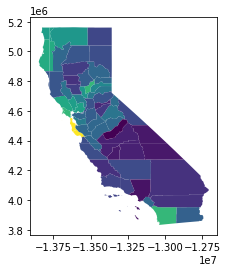

In [65]:
cali_sort.plot('water_risk')

In [72]:
import plotly.graph_objects as go

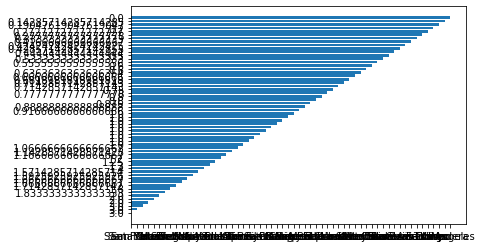

In [83]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Make fake dataset
height = list(cali_sort.index)
bars = list(cali_sort['water_risk'])
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
 
# Show graphic
plt.show()


In [95]:
df = california_rfr[['label','water_risk']]
df.head()

,label,water_risk
3828,"Low - Medium (1 in 1,000 to 2 in 1,000)",1.0
3829,"High (6 in 1,000 to 1 in 100)",3.0
3830,"Medium - High (2 in 1,000 to 6 in 1,000)",2.0
3831,"Medium - High (2 in 1,000 to 6 in 1,000)",2.0
3832,"Low - Medium (1 in 1,000 to 2 in 1,000)",1.0


In [100]:
list_val = {}
for i in range(0,len(df)):
    row =df.iloc[i]
    label = row['label']
    value = row['water_risk']
    list_val[label]= value
print(list_val)

{'Low - Medium (1 in 1,000 to 2 in 1,000)': 1.0, 'High (6 in 1,000 to 1 in 100)': 3.0, 'Medium - High (2 in 1,000 to 6 in 1,000)': 2.0, 'Low (0 to 1 in 1,000)': 0.0, 'Extremely High (more than 1 in 100)': 4.0}


In [102]:
Extremely_High = []
Low = []
Low_medium = []
high=[]
medium_high = []
for el in x:
    if el <= 0:
        Low.append(el)
    elif el >0 and el<=1:
        Low_medium.append(el)
    elif el > 1 and el<= 2:
        medium_high.append(el)
    elif el >2 and el<=3:
        high.append(el)
    else:
        Extremely_High.append(el)


In [103]:
len(Low)

1

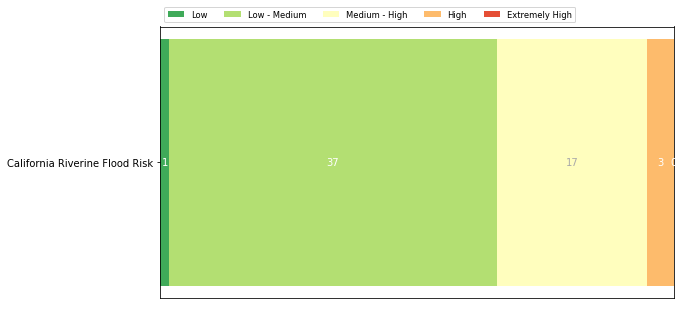

In [107]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Low', 'Low - Medium',
                  'Medium - High', 'High', 'Extremely High']
results = {
    'California Riverine Flood Risk': [len(Low), len(Low_medium), len(medium_high), len(high), len(Extremely_High)]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()


In [116]:
!ls ACSST1Y2018.S1903_2020-07-02T061717

ACSST1Y2018.S1903_data_with_overlays_2020-07-01T103919.csv
ACSST1Y2018.S1903_metadata_2020-07-01T103919.csv
ACSST1Y2018.S1903_table_title_2020-07-01T103919.txt


In [117]:
income = pd.read_csv('./ACSST1Y2018.S1903_2020-07-02T061717/ACSST1Y2018.S1903_data_with_overlays_2020-07-01T103919.csv')
income.head()

,GEO_ID,NAME,S1903_C03_026M,S1903_C01_027E,S1903_C01_027M,S1903_C02_027E,S1903_C02_027M,S1903_C03_027E,S1903_C03_027M,S1903_C01_028E,...,S1903_C01_025M,S1903_C02_025E,S1903_C02_025M,S1903_C03_025E,S1903_C01_020M,S1903_C03_025M,S1903_C01_026E,S1903_C01_026M,S1903_C02_026E,S1903_C02_026M
0,id,Geographic Area Name,Margin of Error!!Median income (dollars) MOE!!...,Estimate!!Number!!FAMILY INCOME BY FAMILY SIZE...,Margin of Error!!Number MOE!!FAMILY INCOME BY ...,Estimate!!Percent Distribution!!FAMILY INCOME ...,Margin of Error!!Percent Distribution MOE!!FAM...,Estimate!!Median income (dollars)!!FAMILY INCO...,Margin of Error!!Median income (dollars) MOE!!...,Estimate!!Number!!FAMILY INCOME BY FAMILY SIZE...,...,Margin of Error!!Number MOE!!FAMILY INCOME BY ...,Estimate!!Percent Distribution!!FAMILY INCOME ...,Margin of Error!!Percent Distribution MOE!!FAM...,Estimate!!Median income (dollars)!!FAMILY INCO...,Margin of Error!!Number MOE!!FAMILIES!!Familie...,Margin of Error!!Median income (dollars) MOE!!...,Estimate!!Number!!FAMILY INCOME BY FAMILY SIZE...,Margin of Error!!Number MOE!!FAMILY INCOME BY ...,Estimate!!Percent Distribution!!FAMILY INCOME ...,Margin of Error!!Percent Distribution MOE!!FAM...
1,0500000US01117,"Shelby County, Alabama",9895,2913,960,5.3,1.7,104685,5679,900,...,1956,24.9,3.2,91202,1053,7841,10352,1325,18.7,2.4
2,0500000US01121,"Talladega County, Alabama",35543,1016,528,4.7,2.4,62476,58740,0,...,1296,22.5,5.3,60902,N,15398,4118,1404,19.0,6.1
3,0500000US01125,"Tuscaloosa County, Alabama",16476,5011,1191,10.4,2.2,79978,9423,1555,...,1894,23.1,3.5,61355,1742,9958,8125,1424,16.9,3.0
4,0500000US04021,"Pinal County, Arizona",10897,9657,1997,8.8,1.7,70112,10766,7152,...,2279,16.0,1.9,66905,2505,4894,15162,2279,13.8,2.1


In [119]:
income_meta = pd.read_csv('./ACSST1Y2018.S1903_2020-07-02T061717/ACSST1Y2018.S1903_metadata_2020-07-01T103919.csv')
income_meta.head()

,GEO_ID,id,Unnamed: 2
0,NAME,Geographic Area Name,NaN
1,S1903_C01_001E,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,NaN
2,S1903_C01_001M,Margin of Error!!Number MOE!!HOUSEHOLD INCOME ...,NaN
3,S1903_C01_002E,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,NaN
4,S1903_C01_002M,Margin of Error!!Number MOE!!HOUSEHOLD INCOME ...,NaN


In [122]:
list(income_meta['id'])

['Geographic Area Name',
 'Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households',
 'Margin of Error!!Number MOE!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households',
 'Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White',
 'Margin of Error!!Number MOE!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!White',
 'Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American',
 'Margin of Error!!Number MOE!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!Black or African American',
 'Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATINO ORIGIN OF HOUSEHOLDER!!Households!!One race--!!American Indian and Alaska Native',
 'Margin of Error!!Number MOE!!HOUSEHOLD INCOME BY 

In [118]:
income

,GEO_ID,NAME,S1903_C03_026M,S1903_C01_027E,S1903_C01_027M,S1903_C02_027E,S1903_C02_027M,S1903_C03_027E,S1903_C03_027M,S1903_C01_028E,...,S1903_C01_025M,S1903_C02_025E,S1903_C02_025M,S1903_C03_025E,S1903_C01_020M,S1903_C03_025M,S1903_C01_026E,S1903_C01_026M,S1903_C02_026E,S1903_C02_026M
0,id,Geographic Area Name,Margin of Error!!Median income (dollars) MOE!!...,Estimate!!Number!!FAMILY INCOME BY FAMILY SIZE...,Margin of Error!!Number MOE!!FAMILY INCOME BY ...,Estimate!!Percent Distribution!!FAMILY INCOME ...,Margin of Error!!Percent Distribution MOE!!FAM...,Estimate!!Median income (dollars)!!FAMILY INCO...,Margin of Error!!Median income (dollars) MOE!!...,Estimate!!Number!!FAMILY INCOME BY FAMILY SIZE...,...,Margin of Error!!Number MOE!!FAMILY INCOME BY ...,Estimate!!Percent Distribution!!FAMILY INCOME ...,Margin of Error!!Percent Distribution MOE!!FAM...,Estimate!!Median income (dollars)!!FAMILY INCO...,Margin of Error!!Number MOE!!FAMILIES!!Familie...,Margin of Error!!Median income (dollars) MOE!!...,Estimate!!Number!!FAMILY INCOME BY FAMILY SIZE...,Margin of Error!!Number MOE!!FAMILY INCOME BY ...,Estimate!!Percent Distribution!!FAMILY INCOME ...,Margin of Error!!Percent Distribution MOE!!FAM...
1,0500000US01117,"Shelby County, Alabama",9895,2913,960,5.3,1.7,104685,5679,900,...,1956,24.9,3.2,91202,1053,7841,10352,1325,18.7,2.4
2,0500000US01121,"Talladega County, Alabama",35543,1016,528,4.7,2.4,62476,58740,0,...,1296,22.5,5.3,60902,N,15398,4118,1404,19.0,6.1
3,0500000US01125,"Tuscaloosa County, Alabama",16476,5011,1191,10.4,2.2,79978,9423,1555,...,1894,23.1,3.5,61355,1742,9958,8125,1424,16.9,3.0
4,0500000US04021,"Pinal County, Arizona",10897,9657,1997,8.8,1.7,70112,10766,7152,...,2279,16.0,1.9,66905,2505,4894,15162,2279,13.8,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0500000US06007,"Butte County, California",17064,3478,966,6.8,1.9,82695,27570,894,...,1536,22.1,2.9,65710,1773,16237,9518,1515,18.5,2.7
835,0500000US06017,"El Dorado County, California",16117,3826,1022,7.7,1.9,121265,17546,761,...,1425,16.1,2.6,103646,1127,18705,8735,1089,17.5,2.2
836,0500000US06025,"Imperial County, California",25045,4205,1171,13.7,3.5,69370,27143,1517,...,1419,23.9,4.1,41277,1624,5604,5527,1197,17.9,3.7
837,0500000US06029,"Kern County, California",5884,23183,2853,11.5,1.4,61244,4662,11696,...,3880,22.1,1.8,49650,3628,3863,43671,3962,21.6,1.9


In [123]:
income_clean = income[['NAME','S1903_C01_001E']]
income_clean.head()

,NAME,S1903_C01_001E
0,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...
1,"Shelby County, Alabama",80944
2,"Talladega County, Alabama",31219
3,"Tuscaloosa County, Alabama",74053
4,"Pinal County, Arizona",147936


In [127]:
income_clean = income_clean[1:]
income_clean.head()

,NAME,S1903_C01_001E
1,"Shelby County, Alabama",80944
2,"Talladega County, Alabama",31219
3,"Tuscaloosa County, Alabama",74053
4,"Pinal County, Arizona",147936
5,"Mendocino County, California",33794


In [133]:
adm2.head()

,iso,name_1,name_2,geometry
0,USA,Colorado,Sedgwick,"MULTIPOLYGON (((-102.65379 41.00320, -102.6204..."
1,USA,South Dakota,Hamlin,"MULTIPOLYGON (((-97.12849 44.54497, -97.49210 ..."
2,USA,South Dakota,Sanborn,"MULTIPOLYGON (((-97.84943 43.85048, -97.96616 ..."
3,USA,Virginia,Lexington,"MULTIPOLYGON (((-79.44795 37.76853, -79.45319 ..."
4,USA,Texas,Gaines,"MULTIPOLYGON (((-102.20379 32.52370, -102.2108..."


In [134]:
name_2 = []
for el in income_clean['NAME']:
    county = el.split(', ')[0].split(' ')[0]
    name_2.append(county)

In [135]:
income_clean['name_2']=name_2

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [136]:
income_clean.head()

,NAME,S1903_C01_001E,name_2
1,"Shelby County, Alabama",80944,Shelby
2,"Talladega County, Alabama",31219,Talladega
3,"Tuscaloosa County, Alabama",74053,Tuscaloosa
4,"Pinal County, Arizona",147936,Pinal
5,"Mendocino County, California",33794,Mendocino


In [137]:
income_usa = pd.merge(adm2,income_clean, how="inner",on='name_2')
income_usa.head()

,iso,name_1,name_2,geometry,NAME,S1903_C01_001E
0,USA,Colorado,Sedgwick,"MULTIPOLYGON (((-102.65379 41.00320, -102.6204...","Sedgwick County, Kansas",198024
1,USA,Kansas,Sedgwick,"MULTIPOLYGON (((-97.15142 37.47639, -97.80678 ...","Sedgwick County, Kansas",198024
2,USA,Virginia,Lexington,"MULTIPOLYGON (((-79.44795 37.76853, -79.45319 ...","Lexington County, South Carolina",115566
3,USA,South Carolina,Lexington,"MULTIPOLYGON (((-81.01254 33.88016, -81.03798 ...","Lexington County, South Carolina",115566
4,USA,Texas,Hall,"MULTIPOLYGON (((-100.41869 34.31445, -100.5121...","Hall County, Georgia",64990


In [139]:
income_usa.to_file("./income_usa.json", driver="GeoJSON")